In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

#### Name: Qi Yue USC ID: 5081825219

#### (b) Pre-Processing and Exploratory data analysis:
i. Make scatterplots of the independent variables in the dataset. Use color toshow Classes 0 and 1.

In [2]:
# Convert DAT file into CSV file
# Add header for csv file
head_set = [
    "pelvic_incidence",
    "pelvic_tilt",
    "lumbar_lordosis_angle",
    "sacral_slope",
    "pelvic radius",
    "grade_of_spondylolisthesis",
    "classes"
]
df = pd.read_table('../data/vertebral_column_data/column_2C.dat',sep = ' ',header=None, names=head_set, engine='python')
df.to_csv('../data/vertebral_column_data/column_2C.csv', index = False)
df1 = pd.read_csv('../data/vertebral_column_data/column_2C.csv')

# Modify classification task NO=0 and AB=1
for i in range(len(df1['classes'])):   
    if df1.loc[i, 'classes'] == 'NO':
        df1.loc[i, 'classes'] = 0
    else:
        df1.loc[i, 'classes'] = 1
df1



,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic radius,grade_of_spondylolisthesis,classes
0,63.03,22.55,39.61,40.48,98.67,-0.25,1
1,39.06,10.06,25.02,29.00,114.41,4.56,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,1
3,69.30,24.65,44.31,44.64,101.87,11.21,1
4,49.71,9.65,28.32,40.06,108.17,7.92,1
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,0
308,45.25,8.69,41.58,36.56,118.55,0.21,0


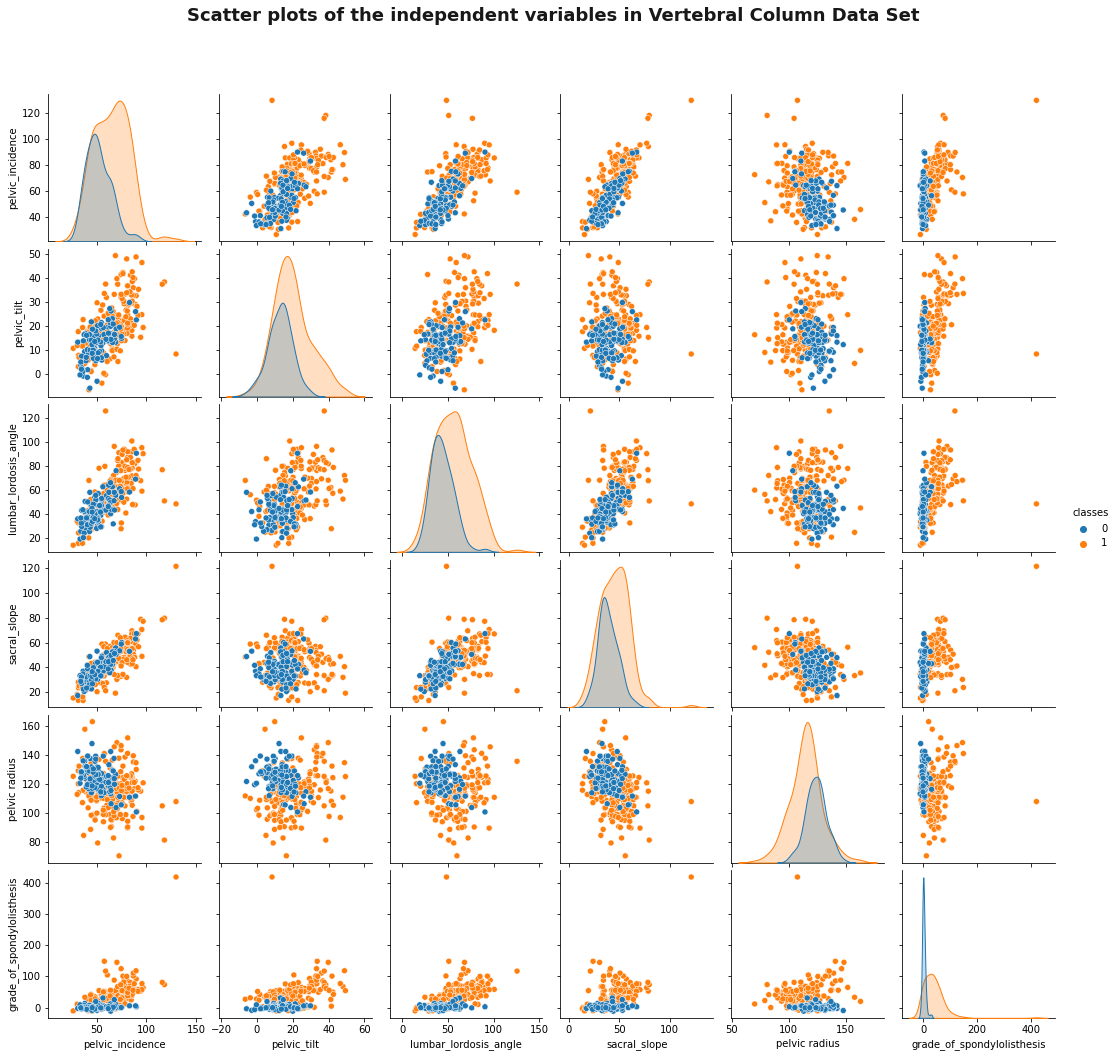

In [3]:
# Create the default pairplot
pairplot_fig = sns.pairplot(df1, hue = 'classes')
plt.subplots_adjust(top=0.9)
pairplot_fig.fig.suptitle("Scatter plots of the independent variables in Vertebral Column Data Set", fontsize=18, alpha=0.9, weight='bold')
plt.show()

ii. Make boxplots for each of the independent variables. Use color to show
Classes 0 and 1 (see ISLR p. 129).

/Users/qy/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qy/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/qy/Applications/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

Text(0.5, 0.98, "Boxplots of each variable's distribution for Class Normal or Abnormal")

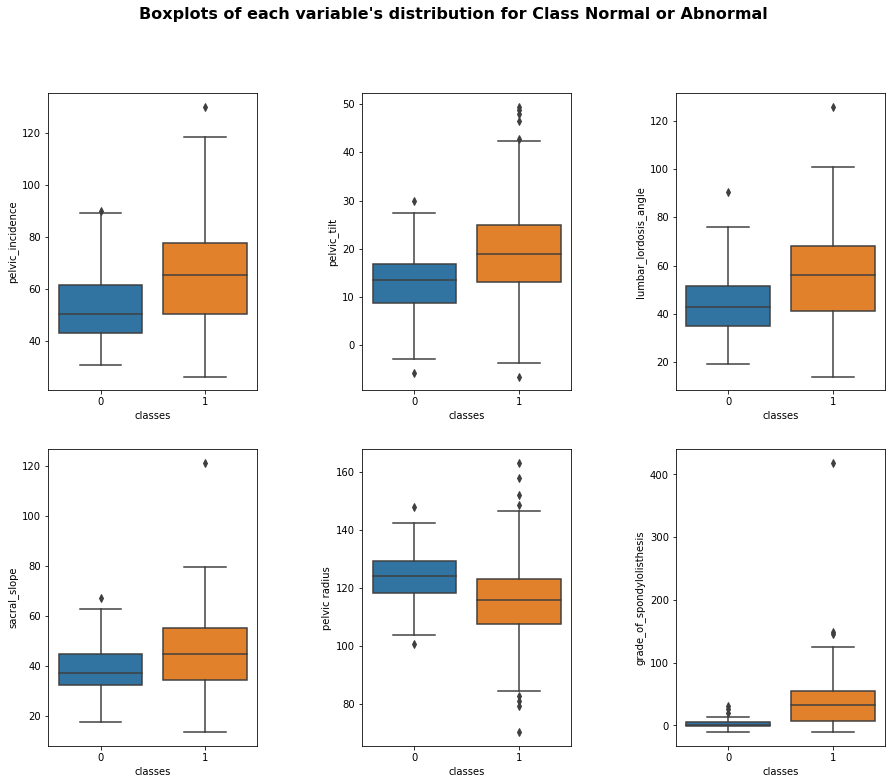

In [4]:
# Set x and y label 
x = "classes"
y1 = "pelvic_incidence"
y2 = "pelvic_tilt"
y3 = "lumbar_lordosis_angle"
y4 = "sacral_slope"
y5 = "pelvic radius"
y6 = "grade_of_spondylolisthesis"
# Create the canvas and subplots
fig = plt.figure(figsize=(15,12))
ax1 = fig.add_subplot(2, 3, 1)
sns.boxplot(x, y1, data=df1)
ax2 = fig.add_subplot(2, 3, 2)
sns.boxplot(x, y2, data=df1)
ax3 = fig.add_subplot(2, 3, 3)
sns.boxplot(x, y3, data=df1)
ax4 = fig.add_subplot(2, 3, 4)
sns.boxplot(x, y4, data=df1)
ax5 = fig.add_subplot(2, 3, 5)
sns.boxplot(x, y5, data=df1)
ax6 = fig.add_subplot(2, 3, 6)
sns.boxplot(x, y6, data=df1)
fig.subplots_adjust(wspace = 0.5, hspace = 0.2 )
fig.suptitle("Boxplots of each variable's distribution for Class Normal or Abnormal", fontsize=16, weight='bold')

iii. Select the first 70 rows of Class 0 and the first 140 rows of Class 1 as the
training set and the rest of the data as the test set.

In [5]:
# Select the first 70 rows of Class 0
x_train0 = df1.loc[df1.classes==0].values
x_train_0 = x_train0[:70, [0,1,2,3,4,5]]
# Select the first 140 rows of Class 1
x_train1 = df1.loc[df1.classes==1].values
x_train_1 = x_train1[:140, [0,1,2,3,4,5]]
# Merge two arraies as the training set
X_train = np.vstack((x_train_1, x_train_0))

# Select the rest rows of Class 0
x_test0 = df1.loc[df1.classes==0].values
x_test_0 = x_test0[70:, [0,1,2,3,4,5]]
# Select the rest rows of Class 1
x_test1 = df1.loc[df1.classes==1].values
x_test_1 = x_test1[140:, [0,1,2,3,4,5]]
# Merge two arraies as the test set
X_test = np.vstack((x_test_1, x_test_0))

In [6]:
y_train0 = x_train0[:70, [6]]
y_train1 = x_train1[:140, [6]]
y_train = np.vstack((y_train1, y_train0)).flatten()
y_train = y_train.astype('int')

y_test0 = x_test0[70:, [6]]
y_test1 = x_test1[140:, [6]]
y_test = np.vstack((y_test1, y_test0)).flatten()
y_test = y_test.astype('int')


In [7]:
y_test.shape

(100,)

#### (c) Classification using KNN on Vertebral Column Data Set
i. Write code for k-nearest neighbors with Euclidean metric (or use a software
package).


ii. Test all the data in the test database with k nearest neighbors. Take decisions by majority polling. Plot train and test errors in terms of k for
k ∈ {208, 205, . . . , 7, 4, 1, } (in reverse order). You are welcome to use smaller
increments of k. Which k∗
is the most suitable k among those values? Calculate the confusion matrix, true positive rate, true negative rate, precision,
and F1-score when k = k∗.

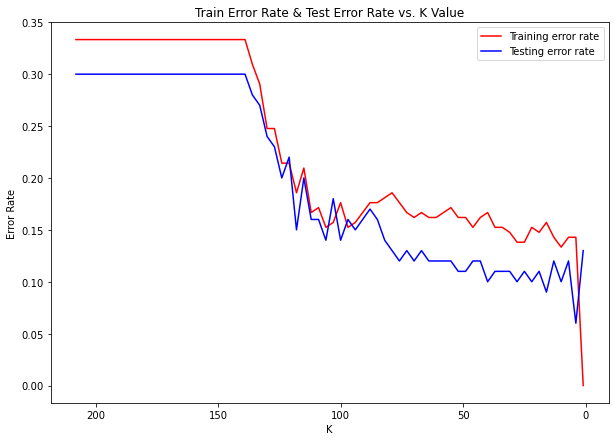

In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

test_error_rates = []
train_error_rates = []
r = range(208, 0, -3)
for i in r:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    # Calculate test error rate
    test_error_rates.append(1-accuracy_score(y_test, y_pred))
    # Calculate train error rate
    y_preds1 = knn.predict(X_train)
    train_error_rates.append(1-accuracy_score(y_train, y_preds1))
    
# Plot train error rates & test error rate on the map   
plt.figure(figsize=(10, 7))
plt.plot(r,train_error_rates, color='red',label='Training error rate')
plt.plot(r,test_error_rates, color='blue',label='Testing error rate')
plt.gca().invert_xaxis()
plt.title('Train Error Rate & Test Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.legend()

In [9]:
# Find out the optimal k value 
k = list(r)[test_error_rates.index(min(test_error_rates))]
print("Minimum error rate: ", min(test_error_rates), "at K =", k)

Minimum error rate:  0.06000000000000005 at K = 4


In [10]:
from sklearn.metrics import confusion_matrix
#  Calculate the confusion matrix
knn = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
knn.fit(X_train, y_train)
y_pred2 = knn.predict(X_test)
cm = confusion_matrix(y_test, y_pred2)
cm

array([[25,  5],
       [ 1, 69]])

In [11]:
# Calculate the true positive rate, true negative rate, precision
true_positive = cm[1][1]
true_negative = cm[0][0]
false_positive = cm [0][1]
false_negative = cm[1][0]
true_positive_rate = true_positive / (true_positive + false_negative)
true_negative_rate = true_negative / (true_negative + false_positive)
precision = true_positive / (true_positive + false_positive)
print('True Positive Rate = ', true_positive_rate)
print('True Negative Rate = ', true_negative_rate)
print('Precision = ', precision)

True Positive Rate =  0.9857142857142858
True Negative Rate =  0.8333333333333334
Precision =  0.9324324324324325


In [12]:
# Calculate the F1-score
# F-score is a harmonic mean of precision and recall.
recall = true_positive_rate
F1_score = (2 * precision * recall) / (precision + recall)
print('F1 score = ', F1_score)

F1 score =  0.9583333333333333


iii. Since the computation time depends on the size of the training set, one may
only use a subset of the training set. Plot the best test error rate,3 which
is obtained by some value of k, against the size of training set, when the
size of training set is N ∈ {10, 20, 30, . . . , 210}.4 Note: for each N, select
your training set by choosing the first [N/3] rows of Class 0 and the first
N − [N/3] rows of Class 1 in the training set you created in 1(b)iii. Also, for
each N, select the optimal k from a set starting from k = 1, increasing by 5.
For example, if N = 200, the optimal k is selected from {1, 6, 11, . . . , 196}.
This plot is called a Learning Curve.

[1, 6, 1, 11, 26, 21, 26, 31, 41, 6, 6, 16, 16, 16, 16, 6, 6, 6, 6, 6, 6]

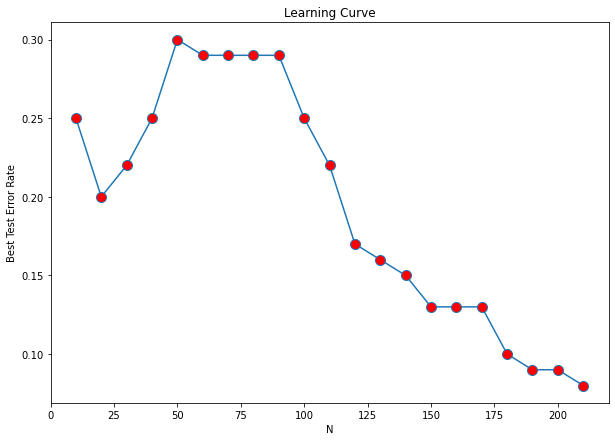

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Select the rest rows of Class 0
x_test0 = df1.loc[df1.classes==0].values
x_test_0 = x_test0[70:, [0,1,2,3,4,5]]
# Select the rest rows of Class 1
x_test1 = df1.loc[df1.classes==1].values
x_test_1 = x_test1[140:, [0,1,2,3,4,5]]
# Merge two arraies as the test set
X_test = np.vstack((x_test_1, x_test_0))

y_test0 = x_test0[70:, [6]]
y_test1 = x_test1[140:, [6]]
y_test = np.vstack((y_test1, y_test0)).flatten()
y_test = y_test.astype('int')

K = []
best_test_err_rate = []
N = [i for i in range(10, 211, 10)]
for n in N:
    # Select the first N/3 rows of Class 0
    x_train_2 = df1.loc[df1.classes==0].values[:n//3, [0,1,2,3,4,5]]
    # Select the first N-(N/3) rows of Class 1
    x_train_3 = df1.loc[df1.classes==1].values[:n-n//3, [0,1,2,3,4,5]]
    # Merge two arraies as the training set
    X_train_b = np.vstack((x_train_2, x_train_3))
    # Select y train dataset
    y_train2 = df1.loc[df1.classes==0].values[:n//3, [6]]
    y_train3 = df1.loc[df1.classes==1].values[:n-n//3, [6]]
    y_train_b = np.vstack((y_train2, y_train3)).flatten()
    y_train_b = y_train_b.astype('int')
    test_errors = []
    for k in range(1, n+1, 5):
        clas = KNeighborsClassifier(n_neighbors=k, metric = 'euclidean')
        clas.fit(X_train_b, y_train_b)
        y_pred_b = clas.predict(X_test)
        test_errors.append(1-accuracy_score(y_test, y_pred_b))
    best_test_err_rate.append(min(test_errors))
    K.append(list(range(1, n, 5))[test_errors.index(min(test_errors))])

# Plot a Learning Curve   
plt.figure(figsize=(10, 7))
plt.plot(N, best_test_err_rate, marker='o', markerfacecolor='red', markersize=10)
plt.title('Learning Curve')
plt.xlabel('N')
plt.ylabel('Best Test Error Rate')
K

(d) Replace the Euclidean metric with the following metrics and test them. Summarize the test errors (i.e., when k = k∗
) in a table. Use all of your training data
and select the best k when {1, 6, 11, . . . , 196}.

i. Minkowski Distance:

A. which becomes Manhattan Distance with p = 1

In [14]:
# Use Manhattan distance
test_error_Man = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'manhattan')
    knn.fit(X_train, y_train)
    y_pred_Man = knn.predict(X_test)
    # Calculate test error rate
    test_error_Man.append(1-accuracy_score(y_test, y_pred_Man))
    
table = {'Test Error' : test_error_Man, 'K' : K}
dataf1 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf1

,Test Error,K
0,0.12,1
1,0.11,6
2,0.11,11
3,0.12,16
4,0.12,21
5,0.11,26
6,0.12,31
7,0.13,36
8,0.13,41
9,0.13,46


In [15]:
# Select the best K
dataf1 = dataf1.loc[dataf1['Test Error'] == dataf1['Test Error'].min()]
dataf1 = dataf1.loc[dataf1['K'] == dataf1['K'].min()]
dataf1


,Test Error,K
1,0.11,6


B. with log10(p) ∈ {0.1, 0.2, 0.3, . . . , 1}. In this case, use the k∗ you found
for the Manhattan distance in 1(d)iA. What is the best log10(p)?

In [16]:
import math
test_error_log = []
I = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
for i in I:
    knn = KNeighborsClassifier(n_neighbors=6, p=math.pow(10,i))
    knn.fit(X_train, y_train)
    y_pred_log = knn.predict(X_test)
    # Calculate test error rate
    test_error_log.append(1-accuracy_score(y_test, y_pred_log))
    
table = {'Test Error' : test_error_log}
dataf2 = pd.DataFrame(table, columns = ['Test Error'])
dataf2

,Test Error
0,0.09
1,0.09
2,0.08
3,0.08
4,0.08
5,0.06
6,0.07
7,0.08
8,0.09
9,0.09


In [17]:
# Select the best log10(p)
#dataf2 = dataf2.loc[dataf2['Test Error'] == dataf2['Test Error'].min()]
index = test_error_log.index(min(test_error_log))
best = I[index]
print('The best log10(p) is', best)

The best log10(p) is 0.6


C. which becomes Chebyshev Distance with p → ∞

In [18]:
# Use Chebyshev distance
test_error_Che = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    knn.fit(X_train, y_train)
    y_pred_Che = knn.predict(X_test)
    # Calculate test error rate
    test_error_Che.append(1-accuracy_score(y_test, y_pred_Che))
    
table = {'Test Error' : test_error_Che, 'K' : K}
dataf3 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf3

,Test Error,K
0,0.13,1
1,0.09,6
2,0.12,11
3,0.08,16
4,0.11,21
5,0.12,26
6,0.12,31
7,0.10,36
8,0.13,41
9,0.12,46


In [19]:
# Select the best K
dataf3 = dataf3.loc[dataf3['Test Error'] == dataf3['Test Error'].min()]
dataf3 = dataf3.loc[dataf3['K'] == dataf3['K'].min()]
dataf3

,Test Error,K
3,0.08,16


ii. Mahalanobis Distance

In [20]:
test_error_Mah = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric='mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.astype(float), rowvar=False))})
    knn.fit(X_train, y_train)
    y_pred_Mah = knn.predict(X_test)
    # Calculate test error rate
    test_error_Mah.append(1-accuracy_score(y_test, y_pred_Mah))
table = {'Test Error' : test_error_Mah, 'K' : K}
dataf4 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf4

,Test Error,K
0,0.17,1
1,0.17,6
2,0.20,11
3,0.20,16
4,0.21,21
5,0.20,26
6,0.23,31
7,0.21,36
8,0.24,41
9,0.24,46


In [21]:
# Select the best K
dataf4 = dataf4.loc[dataf4['Test Error'] == dataf4['Test Error'].min()]
dataf4 = dataf4.loc[dataf4['K'] == dataf4['K'].min()]
dataf4

,Test Error,K
0,0.17,1


(e) The majority polling decision can be replaced by weighted decision, in which the
weight of each point in voting is inversely proportional to its distance from the
query/test data point. In this case, closer neighbors of a query point will have
a greater influence than neighbors which are further away. Use weighted voting
with Euclidean, Manhattan, and Chebyshev distances and report the best test
errors when k ∈ {1, 6, 11, 16, . . . , 196}.

In [22]:
# Use weighted voting with Euclidean
test_error_Euc = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred_Euc = knn.predict(X_test)
    # Calculate test error rate
    test_error_Euc.append(1-accuracy_score(y_test, y_pred_Euc))
table = {'Test Error' : test_error_Euc, 'K' : K}
dataf5 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf5

,Test Error,K
0,0.13,1
1,0.10,6
2,0.12,11
3,0.11,16
4,0.11,21
5,0.11,26
6,0.11,31
7,0.11,36
8,0.11,41
9,0.11,46


In [23]:
# Select the best K
dataf5 = dataf5.loc[dataf5['Test Error'] == dataf5['Test Error'].min()]
dataf5 = dataf5.loc[dataf5['K'] == dataf5['K'].min()]
dataf5

,Test Error,K
1,0.1,6


In [24]:
# Use weighted voting with Manhattan
test_error_Man1 = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan', weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred_Man1 = knn.predict(X_test)
    # Calculate test error rate
    test_error_Man1.append(1-accuracy_score(y_test, y_pred_Man1))
table = {'Test Error' : test_error_Man1, 'K' : K}
dataf6 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf6

,Test Error,K
0,0.12,1
1,0.11,6
2,0.11,11
3,0.12,16
4,0.11,21
5,0.10,26
6,0.11,31
7,0.11,36
8,0.11,41
9,0.11,46


In [25]:
# Select the best K
dataf6 = dataf6.loc[dataf6['Test Error'] == dataf6['Test Error'].min()]
dataf6 = dataf6.loc[dataf6['K'] == dataf6['K'].min()]
dataf6

,Test Error,K
5,0.1,26


In [26]:
# Use weighted voting with Chebyshev
test_error_Che1 = []
K = list(range(1, 197, 5))
for i in K:
    k = i
    knn = KNeighborsClassifier(n_neighbors=k, metric='chebyshev', weights = 'distance')
    knn.fit(X_train, y_train)
    y_pred_Che1 = knn.predict(X_test)
    # Calculate test error rate
    test_error_Che1.append(1-accuracy_score(y_test, y_pred_Che1))
table = {'Test Error' : test_error_Che1, 'K' : K}
dataf7 = pd.DataFrame(table, columns = ['Test Error', 'K'])
dataf7

,Test Error,K
0,0.13,1
1,0.13,6
2,0.12,11
3,0.11,16
4,0.12,21
5,0.12,26
6,0.11,31
7,0.11,36
8,0.11,41
9,0.12,46


In [27]:
# Select the best K
dataf7 = dataf7.loc[dataf7['Test Error'] == dataf7['Test Error'].min()]
dataf7 = dataf7.loc[dataf7['K'] == dataf7['K'].min()]
dataf7

,Test Error,K
3,0.11,16


(f) What is the lowest training error rate you achieved in this homework?

I think the Minimum test error rate:  0.06000000000000005 when we use the Euclidean metric and K equals to 4.
And for training error rate, when K equals to 1, the lowest training error rate would be 0.